Extraction complete.
./extracted_files/ ['Covid19-dataset'] []
./extracted_files/Covid19-dataset ['test', 'train'] []
./extracted_files/Covid19-dataset/test ['Viral Pneumonia', 'Normal', 'Covid'] []
./extracted_files/Covid19-dataset/test/Viral Pneumonia [] ['0114.jpeg', '0111.jpeg', '0119.jpeg', '0103.jpeg', '0109.jpeg', '0108.jpeg', '0112.jpeg', '0107.jpeg', '0106.jpeg', '0102.jpeg', '0115.jpeg', '0101.jpeg', '0120.jpeg', '0118.jpeg', '0113.jpeg', '0117.jpeg', '0105.jpeg', '0116.jpeg', '0110.jpeg', '0104.jpeg']
./extracted_files/Covid19-dataset/test/Normal [] ['0114.jpeg', '0111.jpeg', '0119.jpeg', '0103.jpeg', '0109.jpeg', '0108.jpeg', '0112.jpeg', '0107.jpeg', '0106.jpeg', '0102.jpeg', '0115.jpeg', '0121.jpeg', '0101.jpeg', '0120.jpeg', '0118.jpeg', '0122.jpeg', '0117.jpeg', '0105.jpeg', '0116.jpeg', '0110.jpeg']
./extracted_files/Covid19-dataset/test/Covid [] ['0100.jpeg', 'COVID-00003b.jpg', 'auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', '0105.png', '011

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.4079 - loss: 1.5186 - val_accuracy: 0.7727 - val_loss: 0.7639
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7780 - loss: 0.6593 - val_accuracy: 0.8333 - val_loss: 0.4771
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8763 - loss: 0.3056 - val_accuracy: 0.9091 - val_loss: 0.2884
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9025 - loss: 0.2469 - val_accuracy: 0.9091 - val_loss: 0.2458
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9470 - loss: 0.1635 - val_accuracy: 0.8939 - val_loss: 0.2388
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9708 - loss: 0.0998 - val_accuracy: 0.9091 - val_loss: 0.2269
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9394 - loss: 0.1328 - val_accuracy: 0.8788 - val_loss: 0.2513
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9745 - loss: 0.0844 - val_accuracy: 0.8939 - val_loss: 0.2182
Epoch 9/

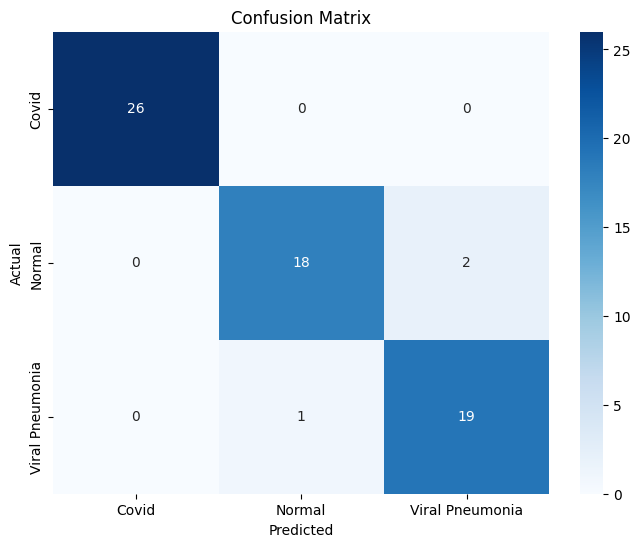

                 precision    recall  f1-score   support

          Covid       1.00      1.00      1.00        26
         Normal       0.95      0.90      0.92        20
Viral Pneumonia       0.90      0.95      0.93        20

       accuracy                           0.95        66
      macro avg       0.95      0.95      0.95        66
   weighted avg       0.96      0.95      0.95        66



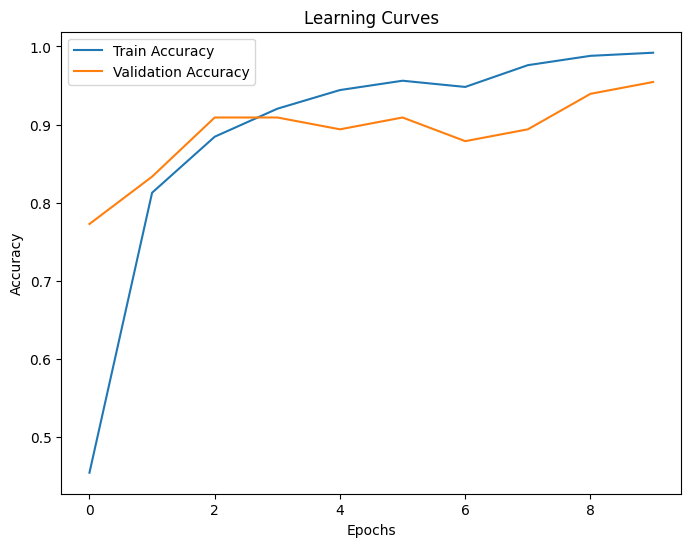

In [4]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Extracting the zip file
zip_path = './archive (1).zip'
extract_path = './extracted_files/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Extraction complete.")

# Check the extracted directory structure
for root, dirs, files in os.walk(extract_path):
    print(root, dirs, files)

# Correct the paths
if 'Covid19-dataset' in os.listdir(extract_path):
    train_dir = os.path.join(extract_path, 'Covid19-dataset', 'train')
    test_dir = os.path.join(extract_path, 'Covid19-dataset', 'test')
else:
    raise FileNotFoundError("Train and Test directories not found.")

# Data Preprocessing
img_size = (128, 128)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', color_mode="rgb")

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', color_mode="rgb", shuffle=False)

# Model Creation
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(train_generator, validation_data=test_generator, epochs=10)

# Model Evaluation
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# Confusion Matrix
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys()))

# ROC Curve (for binary classification)
if len(train_generator.class_indices) == 2:
    y_prob = model.predict(test_generator)
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Learning Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', color_mode="grayscale")

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', color_mode="grayscale", shuffle=False)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])


Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Sample Training Images:


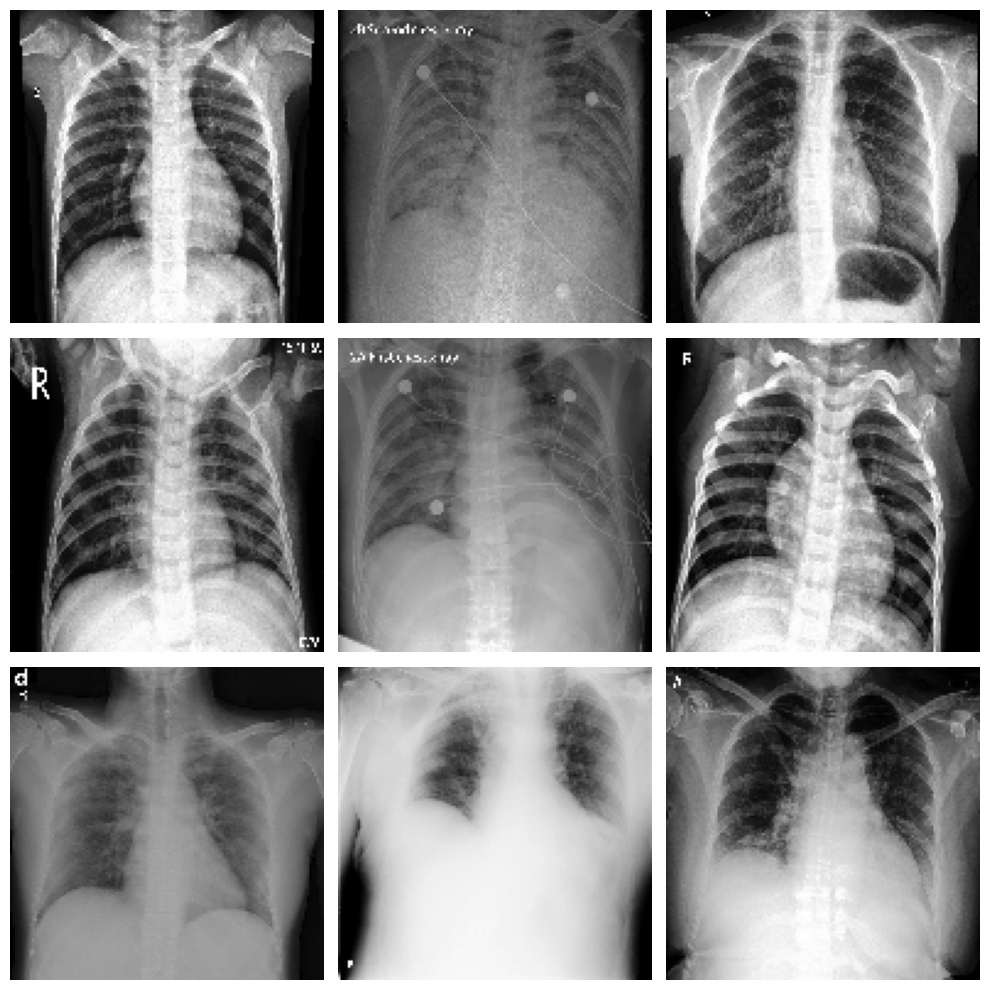

Sample Test Images:


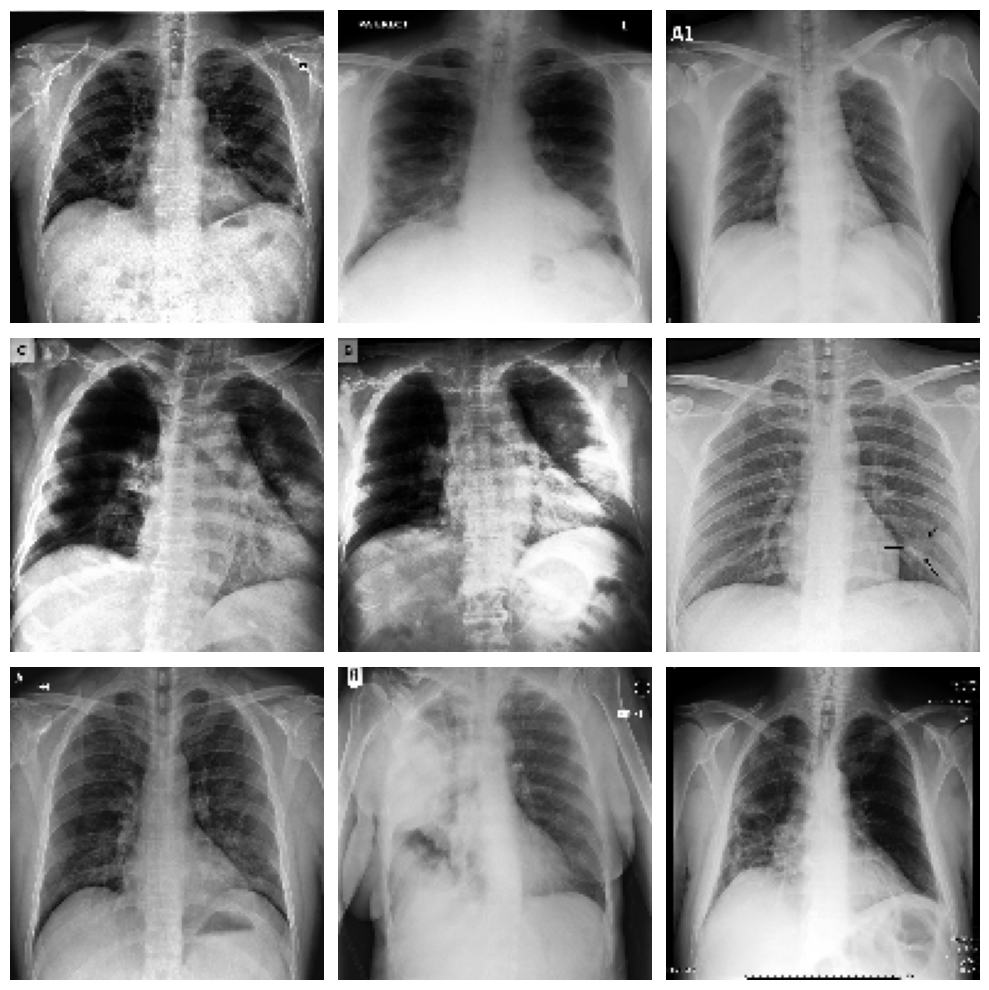

In [6]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images(generator, n_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10,10))
    for i in range(n_images):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray' if images.shape[-1] == 1 else None)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
print("Sample Training Images:")
plot_images(train_generator)
print("Sample Test Images:")
plot_images(test_generator)

Grayscale Training Images:


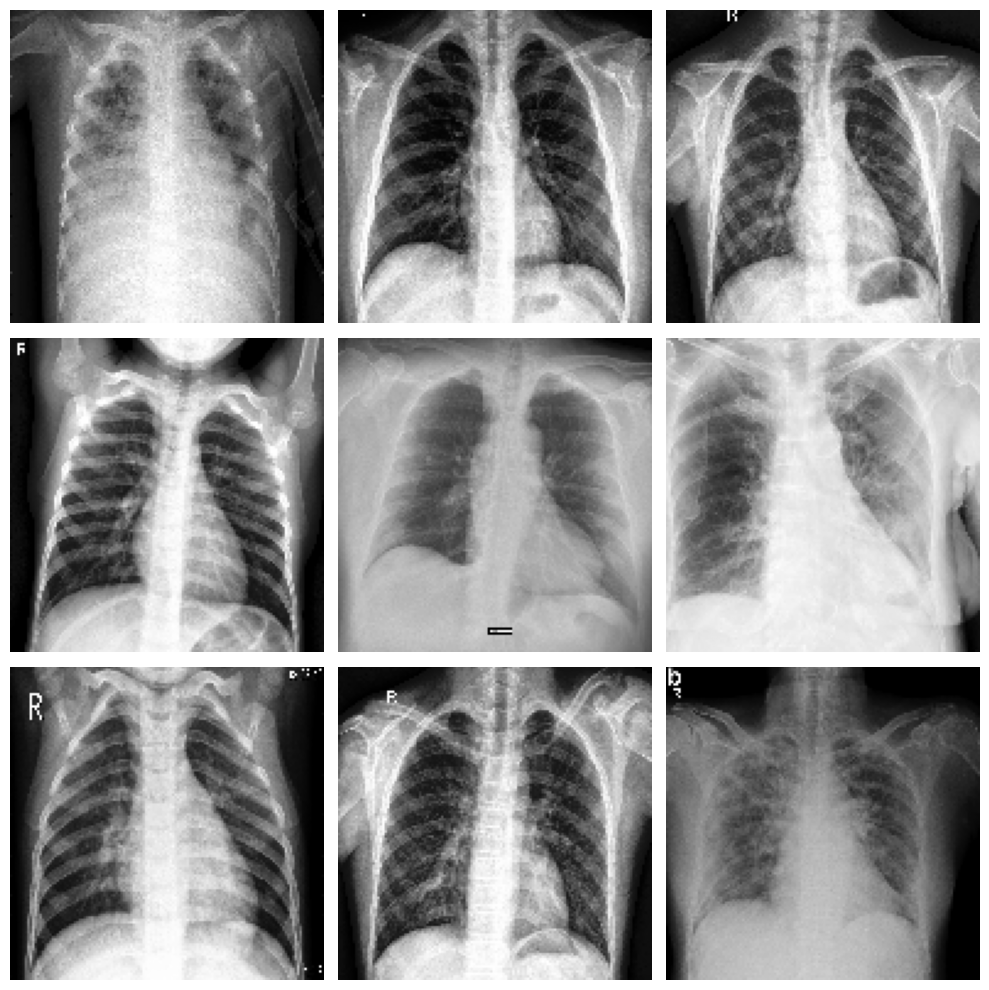

Grayscale Test Images:


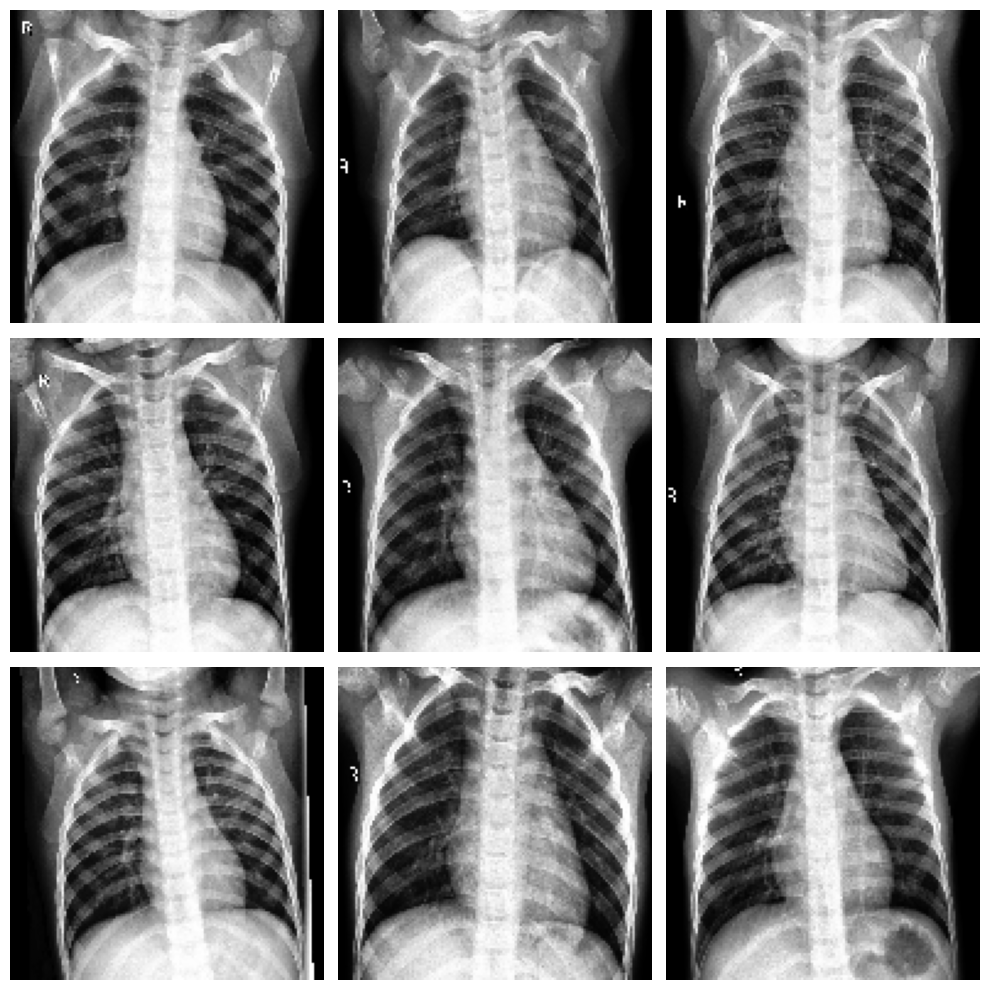

In [7]:
import matplotlib.pyplot as plt
import numpy as np
def plot_grayscale_images(generator, n_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10,10))
    for i in range(n_images):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
print("Grayscale Training Images:")
plot_grayscale_images(train_generator)
print("Grayscale Test Images:")
plot_grayscale_images(test_generator)


RGB Training Images:


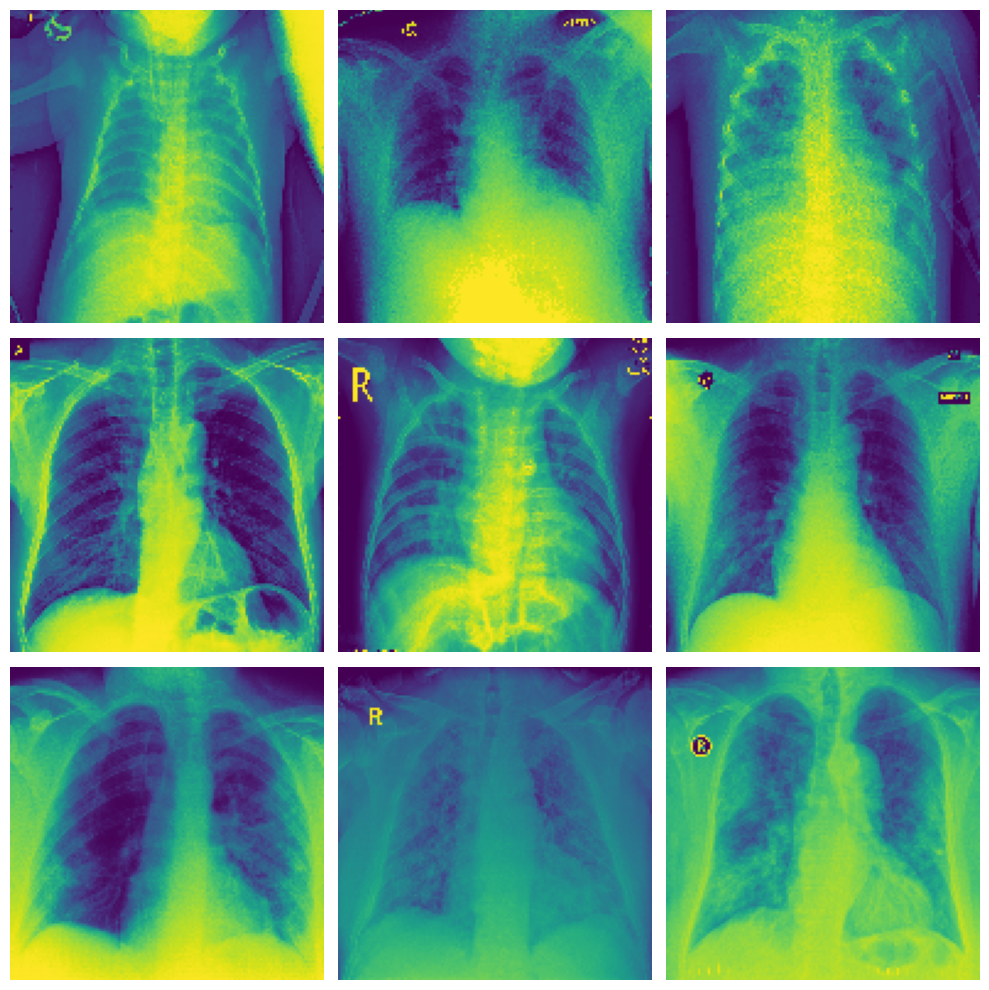

RGB Test Images:


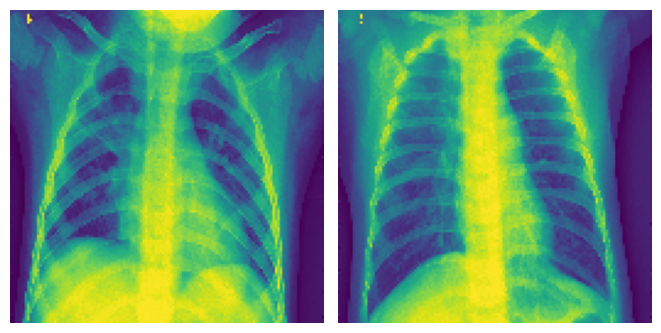

In [8]:
import matplotlib.pyplot as plt
import numpy as np
def plot_rgb_images(generator):
    images, labels = next(generator)
    n_images = min(len(images), 9)
    plt.figure(figsize=(10,10))
    for i in range(n_images):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].astype('float32'))
        plt.axis('off')
    plt.tight_layout()
    plt.show()
print("RGB Training Images:")
plot_rgb_images(train_generator)
print("RGB Test Images:")
plot_rgb_images(test_generator)

Converted Radiographic Images to RGB:


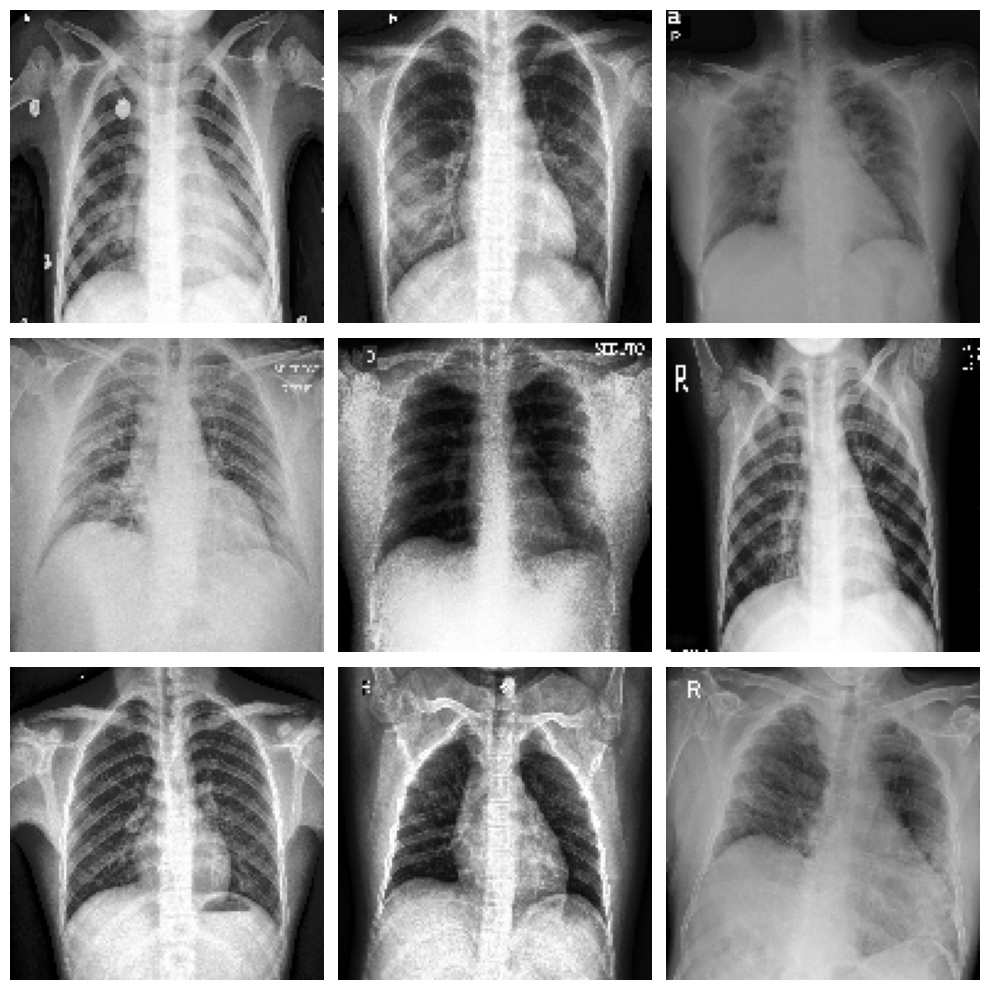

In [9]:
import numpy as np
import matplotlib.pyplot as plt
def convert_grayscale_to_rgb(image):
    if image.shape[-1] == 1:
        return np.concatenate([image] * 3, axis=-1)
    return image
def plot_rgb_images_from_grayscale(generator):
    images, labels = next(generator)
    n_images = min(len(images), 9)
    plt.figure(figsize=(10,10))
    for i in range(n_images):
        plt.subplot(3, 3, i+1)
        rgb_image = convert_grayscale_to_rgb(images[i])
        plt.imshow(rgb_image)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
print("Converted Radiographic Images to RGB:")
plot_rgb_images_from_grayscale(train_generator)

Found 317 images belonging to 1 classes.
Found 317 images belonging to 1 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 1.0000 - lo

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 867ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


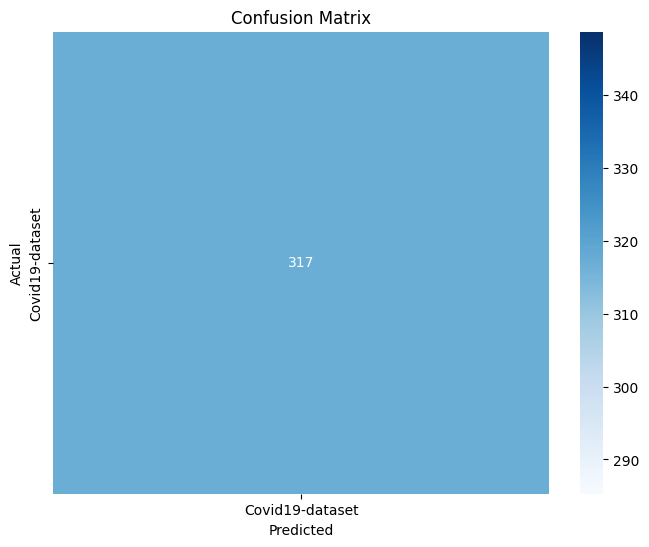

                 precision    recall  f1-score   support

Covid19-dataset       1.00      1.00      1.00       317

       accuracy                           1.00       317
      macro avg       1.00      1.00      1.00       317
   weighted avg       1.00      1.00      1.00       317



In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
train_dir = '/content/extracted_files'
test_dir = '/content/extracted_files'
img_size = (128, 128)
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', color_mode="grayscale")
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', color_mode="grayscale", shuffle=False)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Training
history = model.fit(train_generator, validation_data=test_generator, epochs=10)
# Evaluation
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
# Confusion Matrix
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys()))


Extraction complete.
./extracted_files/ ['Covid19-dataset'] []
./extracted_files/Covid19-dataset ['test', 'train'] []
./extracted_files/Covid19-dataset/test ['Viral Pneumonia', 'Normal', 'Covid'] []
./extracted_files/Covid19-dataset/test/Viral Pneumonia [] ['0114.jpeg', '0111.jpeg', '0119.jpeg', '0103.jpeg', '0109.jpeg', '0108.jpeg', '0112.jpeg', '0107.jpeg', '0106.jpeg', '0102.jpeg', '0115.jpeg', '0101.jpeg', '0120.jpeg', '0118.jpeg', '0113.jpeg', '0117.jpeg', '0105.jpeg', '0116.jpeg', '0110.jpeg', '0104.jpeg']
./extracted_files/Covid19-dataset/test/Normal [] ['0114.jpeg', '0111.jpeg', '0119.jpeg', '0103.jpeg', '0109.jpeg', '0108.jpeg', '0112.jpeg', '0107.jpeg', '0106.jpeg', '0102.jpeg', '0115.jpeg', '0121.jpeg', '0101.jpeg', '0120.jpeg', '0118.jpeg', '0122.jpeg', '0117.jpeg', '0105.jpeg', '0116.jpeg', '0110.jpeg']
./extracted_files/Covid19-dataset/test/Covid [] ['0100.jpeg', 'COVID-00003b.jpg', 'auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', '0105.png', '011

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4491 - loss: 1.8941 - val_accuracy: 0.3030 - val_loss: 1.1049
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5496 - loss: 0.9334 - val_accuracy: 0.7273 - val_loss: 0.6460
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8194 - loss: 0.4622 - val_accuracy: 0.8333 - val_loss: 0.4152
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9090 - loss: 0.2495 - val_accuracy: 0.8182 - val_loss: 0.3464
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9086 - loss: 0.2030 - val_accuracy: 0.9091 - val_loss: 0.2457
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9599 - loss: 0.1235 - val_accuracy: 0.8939 - val_loss: 0.2431
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9675 - loss: 0.1042 - val_accuracy: 0.9242 - val_loss: 0.1903
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9772 - loss: 0.0882 - val_accuracy: 0.9091 - val_loss: 0.1998
Epoch 9/

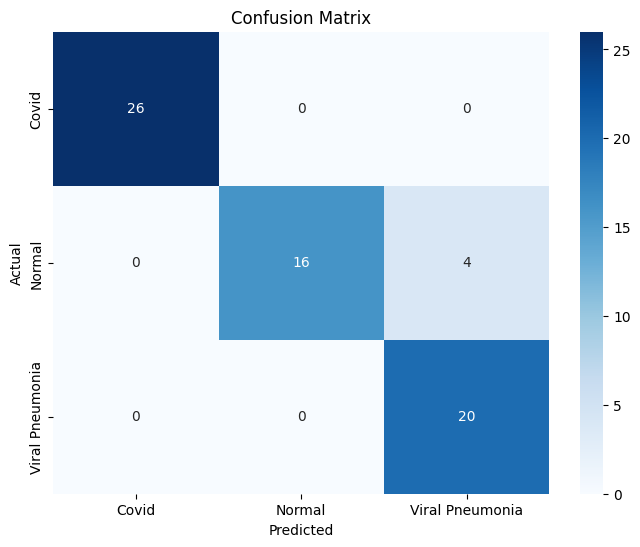

                 precision    recall  f1-score   support

          Covid       1.00      1.00      1.00        26
         Normal       1.00      0.80      0.89        20
Viral Pneumonia       0.83      1.00      0.91        20

       accuracy                           0.94        66
      macro avg       0.94      0.93      0.93        66
   weighted avg       0.95      0.94      0.94        66



In [11]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Extracting the zip file
zip_path = './archive (1).zip'
extract_path = './extracted_files/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Extraction complete.")

# Check the extracted directory structure
for root, dirs, files in os.walk(extract_path):
    print(root, dirs, files)

# Correct the paths
if 'Covid19-dataset' in os.listdir(extract_path):
    train_dir = os.path.join(extract_path, 'Covid19-dataset', 'train')
    test_dir = os.path.join(extract_path, 'Covid19-dataset', 'test')
else:
    raise FileNotFoundError("Train and Test directories not found.")

# Data Preprocessing
img_size = (128, 128)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', color_mode="rgb")

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', color_mode="rgb", shuffle=False)

# Model Creation
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=test_generator, epochs=10)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys()))
